<a href="https://colab.research.google.com/github/sborah53/Machine-Learning-for-Physical-Sciences/blob/main/MLPS_Scientific_python_basic_crash_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Language Essentials for Science

## Basic Data Types & Operations

In [ ]:
# 1. Integers and Floats
mass = 2         # Integer
velocity = 3.5   # Float
result = mass + velocity
print(f"Result: {result}")

# 2. Strings
element = "Hydrogen"
print(f"Element: {element}")

# 3. Type Conversion
mass_str = "1.67e-27"
mass_float = float(mass_str)
print(f"Mass float: {mass_float}")

# 4. Basic Arithmetic
a, b = 10, 3
print(f"Addition: {a + b}")
print(f"Power: {a ** b}")    # 10^3
print(f"Modulo: {a % b}")    # Remainder

Result: 5.5
Element: Hydrogen
Mass float: 1.67e-27
Addition: 13
Power: 1000
Modulo: 1


## Lists (Mutable) vs Tuples (Immutable)

In [ ]:
# --- LISTS ---
energies = [1.0, 2.5, 3.7]
energies[1] = 2.0        # Modify
energies.append(4.5)     # Add
print(f"Energies: {energies}")
print(f"Subset: {energies[0:2]}") # Slicing

# --- TUPLES ---
particle = ('electron', 9.1e-31, -1)
name, mass, charge = particle  # Unpacking
print(f"Particle: {name}, Mass: {mass}")
# particle[1] = 0.0  # This would cause an Error!

Energies: [1.0, 2.0, 3.7, 4.5]
Subset: [1.0, 2.0]
Particle: electron, Mass: 9.1e-31


## Loops and Control Flow

In [ ]:
# Control Flow
energy = 7.5  # eV
if energy < 5.0:
    print("Low energy")
elif energy < 10.0:
    print("Medium energy (Band gap)")
else:
    print("High energy")

# Loops
velocities = [0.0, 1.5, 2.0]
for v in velocities:
    ke = 0.5 * 2.0 * v**2
    print(f"v={v}: KE={ke:.2f}")

Medium energy (Band gap)
v=0.0: KE=0.00
v=1.5: KE=2.25
v=2.0: KE=4.00


In [ ]:
# Decay simulation
intensity = 100.0
half_life = 2.5  # Time steps
decay_rate = 0.5**(1/half_life)

time_steps = 0
while intensity > 10.0:
    intensity *= decay_rate
    time_steps += 1
    print(f"Step {time_steps}: {intensity:.1f}")

# Be careful of infinite loops!
count = 0
while count < 100:
    count += 1  # Must increment!

Step 1: 75.8
Step 2: 57.4
Step 3: 43.5
Step 4: 33.0
Step 5: 25.0
Step 6: 18.9
Step 7: 14.4
Step 8: 10.9
Step 9: 8.2


## The "Pythonic" Way: List Comprehensions

List comprehensions are mathematically cleaner (resembling set-builder notation) and often faster than standard for-loops.

In [ ]:
velocities = [0.0, 1.5, 2.0, 3.5, 5.0]

# The Loop Way (Slow/Verbose)
ke = []
for v in velocities:
    ke.append(0.5 * 2.0 * v**2)

# The Pythonic Way (Fast/Concise)
# Syntax: [expression for item in iterable if condition]
ke_fast = [0.5 * 2.0 * v**2 for v in velocities]

print(f"KE List: {ke_fast}")

# Nested Comprehension (e.g., 2D grid)
masses = [1, 2]
energies = [0.5 * m * v**2 for m in masses for v in velocities]
print(f"Energies grid: {energies}")

KE List: [0.0, 2.25, 4.0, 12.25, 25.0]
Energies grid: [0.0, 1.125, 2.0, 6.125, 12.5, 0.0, 2.25, 4.0, 12.25, 25.0]


## Classes in Science

Classes are useful for defining physical systems (e.g., a Harmonic Oscillator) to maintain state (mass, spring constant) separate from the solver logic.

In [ ]:
import numpy as np

class HarmonicOscillator:
    """A damped harmonic oscillator."""

    def __init__(self, k, m, gamma=0.0):
        self.k = k      # Spring constant
        self.m = m      # Mass
        self.gamma = gamma # Damping
        self.omega = np.sqrt(k / m)

    def energy(self, x, v):
        """Total Energy (KE + PE)"""
        ke = 0.5 * self.m * v**2
        pe = 0.5 * self.k * x**2
        return ke + pe

# Instantiation
sys = HarmonicOscillator(k=10.0, m=2.0, gamma=0.1)
E_total = sys.energy(x=1.0, v=0.0)
print(f"System Energy: {E_total:.3f} J")

System Energy: 5.000 J


# Part I: NumPy - The Engine

NumPy provides the `ndarray`: a contiguous block of memory that allows for SIMD (Single Instruction, Multiple Data) operations. It is typically 100x faster than Python lists.

In [ ]:
import numpy as np

# Creating Arrays
x = np.linspace(0, 10, 100)       # Physical grid: 0 to 10
n = np.arange(0, 10, 2)           # Integers: 0, 2, 4...
zeros = np.zeros((3, 3))          # Empty container

# Element-wise operations (Math)
y = x ** 2  # Squaring entire array at once
print(f"First 5 squares: {y[:5]}")

# Slicing
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"Submatrix:\n{matrix[0:2, 1:3]}")

First 5 squares: [0.         0.01020304 0.04081216 0.09182736 0.16324865]
Submatrix:
[[2 3]
 [5 6]]


## Vectorization vs Loops

**Rule**: Never write a for loop over an array if you can avoid it.

In [ ]:
import time

# Create large array
N = 1000000
x = np.linspace(0, 10, N)

# 1. Python Loop (Slow)
start = time.time()
y_loop = []
for val in x:
    y_loop.append(val**2)
end = time.time()
print(f"Loop time: {end - start:.4f} s")

# 2. NumPy Vectorization (Fast)
start = time.time()
y_vec = x**2
end = time.time()
print(f"Vectorized time: {end - start:.4f} s")

Loop time: 0.3201 s
Vectorized time: 0.0090 s


## Broadcasting

Broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations (e.g., adding a 1D array to a 2D matrix).

In [ ]:
# 2D Grid generation without Meshgrid (Memory efficient)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# x is (100,), we make it (100, 1)
# y is (100,), we make it (1, 100)
# Result is (100, 100)
R = np.sqrt(x[:, np.newaxis]**2 + y[np.newaxis, :]**2)

print(f"Shape of R: {R.shape}")

# Linear Algebra
A = np.array([[2, -1], [-1, 2]])
vals, vecs = np.linalg.eig(A)
print(f"Eigenvalues: {vals}")

Shape of R: (100, 100)
Eigenvalues: [3. 1.]


# Part II: Matplotlib

We use the Object-Oriented API (fig, ax = plt.subplots()) for full control over the figure.

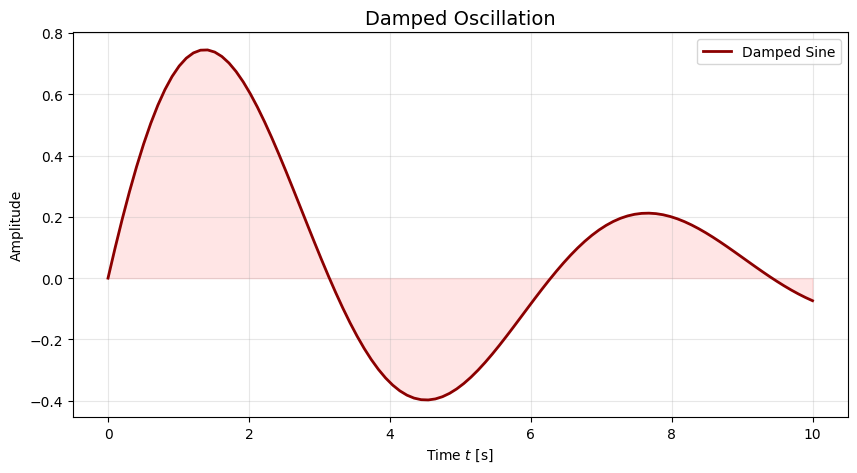

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = np.sin(x) * np.exp(-x/5)

# Create Figure (Canvas) and Axes (Plot)
fig, ax = plt.subplots(figsize=(10, 5))

# Plot
ax.plot(x, y, label='Damped Sine', color='darkred', linewidth=2)
ax.fill_between(x, y, alpha=0.1, color='red')

# Decorate
ax.set_title("Damped Oscillation", fontsize=14)
ax.set_xlabel(r"Time $t$ [s]") # LaTeX support
ax.set_ylabel("Amplitude")
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

## 2D Plots and Vector Fields

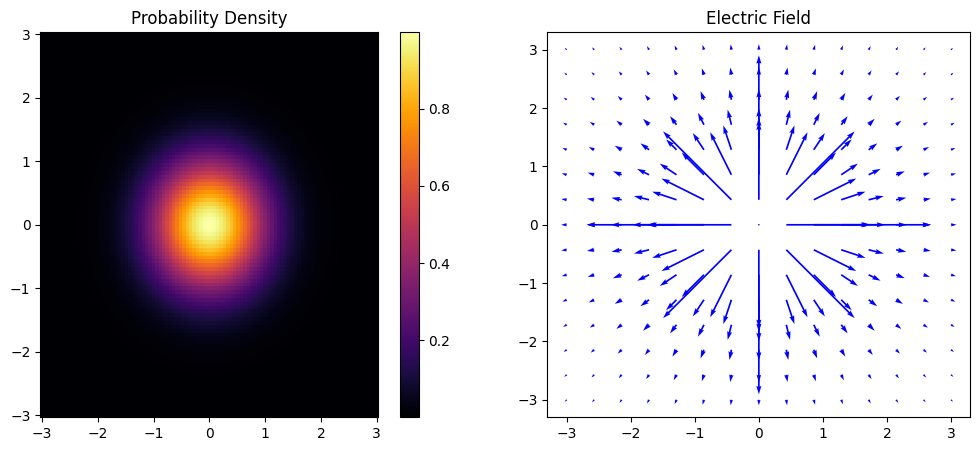

In [ ]:
# Heatmap and Contour
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Heatmap
c = ax1.pcolormesh(X, Y, Z, cmap='inferno', shading='auto')
fig.colorbar(c, ax=ax1)
ax1.set_title("Probability Density")

# Plot 2: Quiver (Vector Field)
# E-field of a point charge
x_q = np.linspace(-3, 3, 15)
y_q = np.linspace(-3, 3, 15)
Xq, Yq = np.meshgrid(x_q, y_q)
Ex = Xq / (Xq**2 + Yq**2 + 0.1)**1.5
Ey = Yq / (Xq**2 + Yq**2 + 0.1)**1.5

ax2.quiver(Xq, Yq, Ex, Ey, color='blue')
ax2.set_title("Electric Field")

plt.show()

# Part III: SciPy

SciPy builds on NumPy to provide scientific algorithms: Integration, Optimization, Signal Processing, and ODE solvers.

## Solving ODEs: The Harmonic OscillatorEquation: $\ddot{x} + \gamma \dot{x} + \omega_0^2 x = 0$

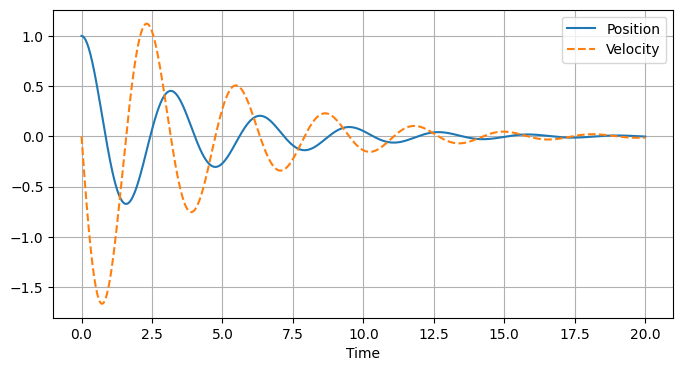

In [ ]:
from scipy.integrate import solve_ivp

def equation_of_motion(t, y, gamma, omega0):
    x, v = y
    dxdt = v
    dvdt = -gamma * v - omega0**2 * x
    return [dxdt, dvdt]

# Setup
y0 = [1.0, 0.0]  # Initial x=1, v=0
t_span = [0, 20]
t_eval = np.linspace(0, 20, 1000)

# Solve
sol = solve_ivp(equation_of_motion, t_span, y0, args=(0.5, 2.0), t_eval=t_eval)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(sol.t, sol.y[0], label='Position')
plt.plot(sol.t, sol.y[1], '--', label='Velocity')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

## Curve Fitting
Extracting physical parameters from noisy experimental data.

Fitted N0: 936.5, Tau: 1.53


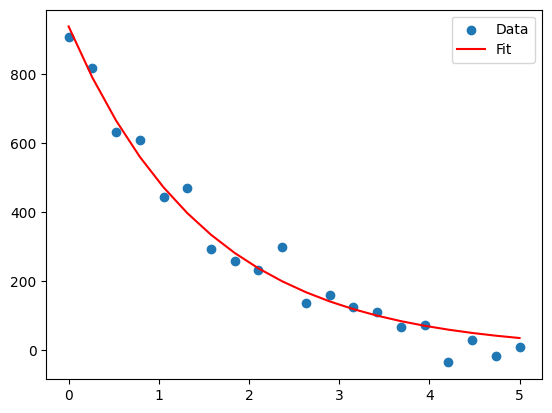

In [ ]:
from scipy.optimize import curve_fit

# 1. Define Model
def decay(t, N0, tau):
    return N0 * np.exp(-t / tau)

# 2. Generate Fake Data
t_data = np.linspace(0, 5, 20)
y_data = decay(t_data, 1000, 1.5) + np.random.normal(0, 50, 20) # Add noise

# 3. Fit
popt, pcov = curve_fit(decay, t_data, y_data, p0=[800, 1.0])
print(f"Fitted N0: {popt[0]:.1f}, Tau: {popt[1]:.2f}")

# 4. Plot
plt.scatter(t_data, y_data, label='Data')
plt.plot(t_data, decay(t_data, *popt), 'r-', label='Fit')
plt.legend()
plt.show()

# Part IV: Pandas
Pandas is designed for tabular, heterogeneous data (like Excel or CSVs), handling missing values (NaN), and time series.

In [ ]:
import pandas as pd

# Creating a DataFrame
df = pd.DataFrame({
    'Run_ID': [1, 1, 2, 2, 3],
    'Voltage': [1.2, 1.1, 2.5, np.nan, 3.1], # Note the NaN
    'Current': [0.5, 0.4, 0.8, 0.85, 1.2]
})

# 1. Inspection
print("Original Data:")
print(df)

# 2. Cleaning (Interpolation)
df['Voltage'] = df['Voltage'].interpolate()

# 3. Feature Engineering (Physics logic)
df['Power'] = df['Voltage'] * df['Current']

# 4. GroupBy (Aggregation)
print("\nMean values per Run:")
print(df.groupby('Run_ID').mean())

Original Data:
   Run_ID  Voltage  Current
0       1      1.2     0.50
1       1      1.1     0.40
2       2      2.5     0.80
3       2      NaN     0.85
4       3      3.1     1.20

Mean values per Run:
        Voltage  Current  Power
Run_ID                         
1          1.15    0.450   0.52
2          2.65    0.825   2.19
3          3.10    1.200   3.72


# Exercise: Double Pendulum Analysis
Load data (Generate a dummy CSV first).

Clean missing values.

Calculate Energy.

Filter unphysical rows.

Plot phase space.

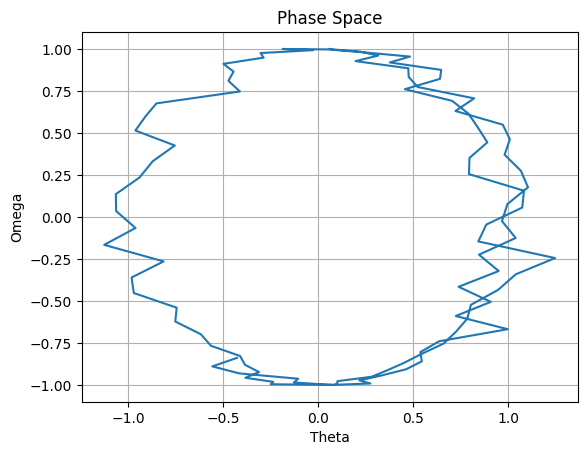

In [ ]:
# Create dummy data for the exercise
data = {
    't': np.linspace(0, 10, 100),
    'theta': np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100),
    'omega': np.cos(np.linspace(0, 10, 100))
}
data['theta'][10] = np.nan # Introduce error
df_ex = pd.DataFrame(data)

# Your solution here:
# 1. Clean
df_ex = df_ex.interpolate()
# 2. Plot Phase Space
plt.plot(df_ex['theta'], df_ex['omega'])
plt.title("Phase Space")
plt.xlabel("Theta")
plt.ylabel("Omega")
plt.grid()
plt.show()